<a href="https://colab.research.google.com/github/D3WYAN/ML_CW_20201037/blob/main/ML_CW_20201037.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
data = pd.read_csv("/content/spambase.data.csv", header=None)


In [89]:
def get_column_names(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    column_names = []
    for line in lines:
        if line.startswith('word_freq_') or line.startswith('char_freq_') or line.startswith('capital_'):
            column_names.append(line.split(':')[0])

    column_names.append('spam')

    return column_names

In [90]:
# Assign column names to the DataFrame
column_names = get_column_names('/content/spambase.names')
data.columns = column_names
#print(column_names)

In [91]:
print(data.isnull().sum(),"\n==================")
data = data.dropna()
print(data.duplicated().sum())
data = data.drop_duplicates()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [92]:
# Print basic statistics about the DataFrame
print(data.describe())


       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4210.000000        4210.000000    4210.000000   4210.000000   
mean         0.104366           0.112656       0.291473      0.063078   
std          0.300005           0.454260       0.515719      1.352487   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.440000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4210.000000     4210.000000       4210.000000         4210.000000   
mean        0.325321        0.096656          0.117475            0.108000   
std         0.687805        0.276030          0.397284            0.410282   
min         0.000000        0.

In [93]:
#separates the target variable 'spam' from the rest of the features in the dataset.
X = data.drop('spam', axis=1)
y = data['spam']


In [94]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the data before performing PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [95]:
from sklearn.model_selection import train_test_split

#Splitting the data into training and testing sets and setting a random seed for reproducibility
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [96]:
from sklearn.neighbors import KNeighborsClassifier

#Creating a K-nearest neighbors classifier object with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

#Fitting the classifier to the training data to learn from the data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [97]:
from sklearn.tree import DecisionTreeClassifier

#Creating a decision tree classifier object
tree = DecisionTreeClassifier(max_depth=5)

#Fitting the classifier to the training data to learn from the data
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [98]:
# import the KNeighborsClassifier class from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# import accuracy_score, precision_score, recall_score, and f1_score from sklearn.metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# create a new KNeighborsClassifier model with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# train the KNeighborsClassifier model on the training data (X_train) and labels (y_train)
knn_model.fit(X_train, y_train)

# use the trained model to predict the labels for the test data (X_test)
knn_y_pred = knn_model.predict(X_test)

# calculate the accuracy, precision, recall, and F1 score of the predictions using the actual test labels (y_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)

# print out the results of the KNN model's metrics
print("KNN Model Metrics:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)


KNN Model Metrics:
Accuracy: 0.7420886075949367
Precision: 0.7112970711297071
Recall: 0.6439393939393939
F1 Score: 0.6759443339960238


In [99]:
# Import the required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Decision Tree Classifier object
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier on the training data
dt_classifier.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy score
precision = precision_score(y_test, y_pred) # Calculate the precision score
recall = recall_score(y_test, y_pred) # Calculate the recall score
f1 = f1_score(y_test, y_pred) # Calculate the F1 score

# Print the evaluation metrics
print("Decision tree model evaluation:")
print(f"Accuracy: {accuracy:.3f}") # Print the accuracy score with 3 decimal places
print(f"Precision: {precision:.3f}") # Print the precision score with 3 decimal places
print(f"Recall: {recall:.3f}") # Print the recall score with 3 decimal places
print(f"F1 score: {f1:.3f}") # Print the F1 score with 3 decimal places


Decision tree model evaluation:
Accuracy: 0.888
Precision: 0.881
Recall: 0.845
F1 score: 0.863


In [100]:
# Import necessary metrics from scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use the trained KNN model to predict the class labels of the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy, precision, recall, and F1 score of the KNN model on the test data
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [101]:
# Print out the KNN model's accuracy, precision, recall, and F1 score on the test data
print("KNN Model Evaluation:")
print(f"KNN accuracy: {acc:.4f}")
print(f"KNN precision: {prec:.4f}")
print(f"KNN recall: {rec:.4f}")
print(f"KNN F1 score: {f1:.4f}")

KNN Model Evaluation:
KNN accuracy: 0.7484
KNN precision: 0.7075
KNN recall: 0.6780
KNN F1 score: 0.6925


In [102]:
# Predict the test labels using the decision tree model
y_pred_dt = tree.predict(X_test)

# Calculate the evaluation metrics for the decision tree model
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

In [103]:
# Print the evaluation metrics for the decision tree model
print("Decision Tree Model Evaluation:")
print("Accuracy: {:.4f}".format(acc_dt))
print("Precision: {:.4f}".format(prec_dt))
print("Recall: {:.4f}".format(rec_dt))
print("F1-Score: {:.4f}".format(f1_dt))


Decision Tree Model Evaluation:
Accuracy: 0.8908
Precision: 0.9079
Recall: 0.8220
F1-Score: 0.8628


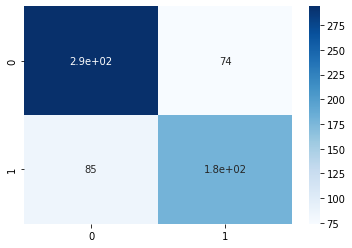

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the confusion matrix for KNN model
cm = confusion_matrix(y_test, knn.predict(X_test))

# Plot the confusion matrix as a heatmap using Seaborn
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()


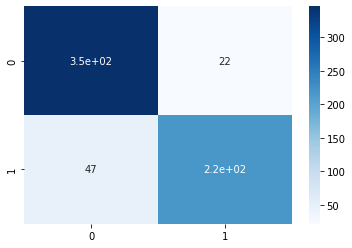

In [105]:
#Get the confusion matrix for KNN model
cm = confusion_matrix(y_test, tree.predict(X_test))

# Plot the confusion matrix as a heatmap using Seaborn
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()


In [106]:
# Import the classification_report function from sklearn.metrics
from sklearn.metrics import classification_report

# Make predictions on the test set using the decision tree model
y_pred = tree.predict(X_test)

# Print the classification report for the predictions using the true labels
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       368
           1       0.91      0.82      0.86       264

    accuracy                           0.89       632
   macro avg       0.89      0.88      0.89       632
weighted avg       0.89      0.89      0.89       632



In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)


Best hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


In [108]:
# Use the trained decision tree model to make predictions on the validation set
y_pred = tree.predict(X_val)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the evaluation metrics
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))


Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 score: 0.90


In [109]:
# Use the trained knn model to make predictions on the validation set
y_pred = knn.predict(X_val)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the evaluation metrics
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))


Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1 score: 0.79
